In [1]:
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing the data

In [2]:
resp_patients_data = pd.read_excel('/kaggle/input/respiratorypatientsdata/Respiratorypatientsdata.xlsx')
resp_patients_data





,EncounterSK,MonthCommence,DaysofWeek,TimeofArrival,TimeofDeparture,LOS,PresentingComplaint,DiagnosisDescription,ArrivalMode,TriagePriority,AgeOnArrival,Gender,Facility,Disposal
0,42719294,2019-04-01,Monday,05:04:00,08:04:00,199.0,Back Pain,Pneumonia,Ambulance,2.0,65 to 70,Female,CRH,Admitted to Hospital
1,42730067,2019-04-01,Monday,12:04:00,15:04:00,166.0,Unwell Adult,Pneumonia,Other,3.0,71 to 80,Male,HRI,Discharged no follow up
2,42739229,2019-04-01,Monday,15:04:00,19:04:00,239.0,Sepsis,Pneumonia,Ambulance,2.0,25 to 34,Female,CRH,Discharged no follow up
3,42745322,2019-04-01,Monday,23:04:00,02:04:00,148.0,SOB - Adult,Asthma,Other,2.0,45 to 54,Male,CRH,Discharged no follow up
4,42750428,2019-04-01,Tuesday,09:04:00,13:04:00,193.0,Falls,Pneumonia,Ambulance,3.0,81 to 90,Female,HRI,Admitted to Hospital
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6769,66755290,2023-03-01,Friday,00:03:00,08:03:00,453.0,Breathing Problems,Asthma,Other,3.0,20 to 24,Male,CRH,Discharged no follow up
6770,66765457,2023-03-01,Friday,12:03:00,14:03:00,85.0,Asthma,Asthma,Other,4.0,25 to 34,Male,HRI,Discharged no follow up
6771,66772315,2023-03-01,Friday,17:03:00,23:03:00,358.0,Chest pain,Asthma,Ambulance,3.0,55 to 64,Female,CRH,Discharged no follow up
6772,66772885,2023-03-01,Friday,17:03:00,00:04:00,383.0,Asthma,Asthma,Other,3.0,81 to 90,Female,HRI,Discharged no follow up


# DATA EXPLORATION


In [3]:
#retrieving info about the data
resp_patients_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6774 entries, 0 to 6773
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   EncounterSK           6774 non-null   int64         
 1   MonthCommence         6774 non-null   datetime64[ns]
 2   DaysofWeek            6774 non-null   object        
 3   TimeofArrival         6774 non-null   object        
 4   TimeofDeparture       6773 non-null   object        
 5   LOS                   6773 non-null   float64       
 6   PresentingComplaint   6774 non-null   object        
 7   DiagnosisDescription  6774 non-null   object        
 8   ArrivalMode           6774 non-null   object        
 9   TriagePriority        6773 non-null   float64       
 10  AgeOnArrival          6774 non-null   object        
 11  Gender                6774 non-null   object        
 12  Facility              6774 non-null   object        
 13  Disposal          

In [4]:
#Getting details of the columns
resp_patients_data.columns

Index(['EncounterSK', 'MonthCommence', 'DaysofWeek', 'TimeofArrival',
       'TimeofDeparture', 'LOS', 'PresentingComplaint', 'DiagnosisDescription',
       'ArrivalMode', 'TriagePriority', 'AgeOnArrival', 'Gender', 'Facility',
       'Disposal'],
      dtype='object')

In [5]:
# retrieving details of the shape of the data to check details of the rows and columns
resp_patients_data.shape

(6774, 14)

In [6]:
#Retrieving statistical info of the numerical variables
resp_patients_data.describe()

,EncounterSK,LOS,TriagePriority
count,6.774000e+03,6773.000000,6773.000000
mean,5.489788e+07,275.249373,2.702052
std,7.100554e+06,187.662578,0.754661
min,4.271929e+07,5.000000,0.000000
25%,4.851426e+07,171.000000,2.000000
50%,5.515027e+07,227.000000,3.000000
75%,6.109558e+07,335.000000,3.000000
max,6.677317e+07,7279.000000,5.000000


In [7]:
resp_patients_data.isnull()

,EncounterSK,MonthCommence,DaysofWeek,TimeofArrival,TimeofDeparture,LOS,PresentingComplaint,DiagnosisDescription,ArrivalMode,TriagePriority,AgeOnArrival,Gender,Facility,Disposal
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6769,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6770,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6771,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6772,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# checking the number of missing values

In [8]:
resp_patients_data.isnull().sum()

EncounterSK             0
MonthCommence           0
DaysofWeek              0
TimeofArrival           0
TimeofDeparture         1
LOS                     1
PresentingComplaint     0
DiagnosisDescription    0
ArrivalMode             0
TriagePriority          1
AgeOnArrival            0
Gender                  0
Facility                0
Disposal                0
dtype: int64

# DATA PREPROCESSING

# dropping missing values

In [9]:
resp_patients_data=resp_patients_data.dropna()
resp_patients_data

,EncounterSK,MonthCommence,DaysofWeek,TimeofArrival,TimeofDeparture,LOS,PresentingComplaint,DiagnosisDescription,ArrivalMode,TriagePriority,AgeOnArrival,Gender,Facility,Disposal
0,42719294,2019-04-01,Monday,05:04:00,08:04:00,199.0,Back Pain,Pneumonia,Ambulance,2.0,65 to 70,Female,CRH,Admitted to Hospital
1,42730067,2019-04-01,Monday,12:04:00,15:04:00,166.0,Unwell Adult,Pneumonia,Other,3.0,71 to 80,Male,HRI,Discharged no follow up
2,42739229,2019-04-01,Monday,15:04:00,19:04:00,239.0,Sepsis,Pneumonia,Ambulance,2.0,25 to 34,Female,CRH,Discharged no follow up
3,42745322,2019-04-01,Monday,23:04:00,02:04:00,148.0,SOB - Adult,Asthma,Other,2.0,45 to 54,Male,CRH,Discharged no follow up
4,42750428,2019-04-01,Tuesday,09:04:00,13:04:00,193.0,Falls,Pneumonia,Ambulance,3.0,81 to 90,Female,HRI,Admitted to Hospital
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6769,66755290,2023-03-01,Friday,00:03:00,08:03:00,453.0,Breathing Problems,Asthma,Other,3.0,20 to 24,Male,CRH,Discharged no follow up
6770,66765457,2023-03-01,Friday,12:03:00,14:03:00,85.0,Asthma,Asthma,Other,4.0,25 to 34,Male,HRI,Discharged no follow up
6771,66772315,2023-03-01,Friday,17:03:00,23:03:00,358.0,Chest pain,Asthma,Ambulance,3.0,55 to 64,Female,CRH,Discharged no follow up
6772,66772885,2023-03-01,Friday,17:03:00,00:04:00,383.0,Asthma,Asthma,Other,3.0,81 to 90,Female,HRI,Discharged no follow up


In [10]:
resp_patients_data.isnull().sum()

EncounterSK             0
MonthCommence           0
DaysofWeek              0
TimeofArrival           0
TimeofDeparture         0
LOS                     0
PresentingComplaint     0
DiagnosisDescription    0
ArrivalMode             0
TriagePriority          0
AgeOnArrival            0
Gender                  0
Facility                0
Disposal                0
dtype: int64

 # Modify column name for AgeOnArrival and Diagnosis description

In [11]:
#Modify column name for AgeOnArrival and Diagnosis description
resp_patients_data = resp_patients_data.rename(columns={"AgeOnArrival": "AgeGroup", "DiagnosisDescription": "Diagnosis"})
resp_patients_data

,EncounterSK,MonthCommence,DaysofWeek,TimeofArrival,TimeofDeparture,LOS,PresentingComplaint,Diagnosis,ArrivalMode,TriagePriority,AgeGroup,Gender,Facility,Disposal
0,42719294,2019-04-01,Monday,05:04:00,08:04:00,199.0,Back Pain,Pneumonia,Ambulance,2.0,65 to 70,Female,CRH,Admitted to Hospital
1,42730067,2019-04-01,Monday,12:04:00,15:04:00,166.0,Unwell Adult,Pneumonia,Other,3.0,71 to 80,Male,HRI,Discharged no follow up
2,42739229,2019-04-01,Monday,15:04:00,19:04:00,239.0,Sepsis,Pneumonia,Ambulance,2.0,25 to 34,Female,CRH,Discharged no follow up
3,42745322,2019-04-01,Monday,23:04:00,02:04:00,148.0,SOB - Adult,Asthma,Other,2.0,45 to 54,Male,CRH,Discharged no follow up
4,42750428,2019-04-01,Tuesday,09:04:00,13:04:00,193.0,Falls,Pneumonia,Ambulance,3.0,81 to 90,Female,HRI,Admitted to Hospital
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6769,66755290,2023-03-01,Friday,00:03:00,08:03:00,453.0,Breathing Problems,Asthma,Other,3.0,20 to 24,Male,CRH,Discharged no follow up
6770,66765457,2023-03-01,Friday,12:03:00,14:03:00,85.0,Asthma,Asthma,Other,4.0,25 to 34,Male,HRI,Discharged no follow up
6771,66772315,2023-03-01,Friday,17:03:00,23:03:00,358.0,Chest pain,Asthma,Ambulance,3.0,55 to 64,Female,CRH,Discharged no follow up
6772,66772885,2023-03-01,Friday,17:03:00,00:04:00,383.0,Asthma,Asthma,Other,3.0,81 to 90,Female,HRI,Discharged no follow up


In [12]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with a column named 'los' containing values in minutes
# Replace 'df' with the actual name of your DataFrame and 'los' with the actual name of your column

# Convert minutes to hours
resp_patients_data['LOS_Hours'] = resp_patients_data['LOS'] / 60

# Drop the original 'los' column if needed
# df.drop(columns=['los'], inplace=True)

# Display the DataFrame with the new 'los_hours' column
print(resp_patients_data)

      EncounterSK MonthCommence DaysofWeek TimeofArrival TimeofDeparture  \
0        42719294    2019-04-01     Monday      05:04:00        08:04:00   
1        42730067    2019-04-01     Monday      12:04:00        15:04:00   
2        42739229    2019-04-01     Monday      15:04:00        19:04:00   
3        42745322    2019-04-01     Monday      23:04:00        02:04:00   
4        42750428    2019-04-01    Tuesday      09:04:00        13:04:00   
...           ...           ...        ...           ...             ...   
6769     66755290    2023-03-01     Friday      00:03:00        08:03:00   
6770     66765457    2023-03-01     Friday      12:03:00        14:03:00   
6771     66772315    2023-03-01     Friday      17:03:00        23:03:00   
6772     66772885    2023-03-01     Friday      17:03:00        00:04:00   
6773     66773170    2023-03-01     Friday      18:03:00        03:04:00   

        LOS PresentingComplaint  Diagnosis ArrivalMode  TriagePriority  \
0     199.0  

# Dropping the columns not required in the model

In [13]:
delete_columns = ['EncounterSK','ArrivalMode', 'TriagePriority', 'Facility', 'Disposal', 'MonthCommence','DaysofWeek','TimeofArrival','TimeofDeparture']

resp_patients_data = resp_patients_data.drop(delete_columns, axis=1)
resp_patients_data

,LOS,PresentingComplaint,Diagnosis,AgeGroup,Gender,LOS_Hours
0,199.0,Back Pain,Pneumonia,65 to 70,Female,3.316667
1,166.0,Unwell Adult,Pneumonia,71 to 80,Male,2.766667
2,239.0,Sepsis,Pneumonia,25 to 34,Female,3.983333
3,148.0,SOB - Adult,Asthma,45 to 54,Male,2.466667
4,193.0,Falls,Pneumonia,81 to 90,Female,3.216667
...,...,...,...,...,...,...
6769,453.0,Breathing Problems,Asthma,20 to 24,Male,7.550000
6770,85.0,Asthma,Asthma,25 to 34,Male,1.416667
6771,358.0,Chest pain,Asthma,55 to 64,Female,5.966667
6772,383.0,Asthma,Asthma,81 to 90,Female,6.383333


In [14]:
# Filter the data to keep only the rows with Asthma and Pneumonia complaints
resp_patients_data = resp_patients_data[(resp_patients_data['Diagnosis'].str.contains('Asthma', case=False)) | (resp_patients_data['Diagnosis'].str.contains('Pneumonia', case=False))]
resp_patients_data

,LOS,PresentingComplaint,Diagnosis,AgeGroup,Gender,LOS_Hours
0,199.0,Back Pain,Pneumonia,65 to 70,Female,3.316667
1,166.0,Unwell Adult,Pneumonia,71 to 80,Male,2.766667
2,239.0,Sepsis,Pneumonia,25 to 34,Female,3.983333
3,148.0,SOB - Adult,Asthma,45 to 54,Male,2.466667
4,193.0,Falls,Pneumonia,81 to 90,Female,3.216667
...,...,...,...,...,...,...
6769,453.0,Breathing Problems,Asthma,20 to 24,Male,7.550000
6770,85.0,Asthma,Asthma,25 to 34,Male,1.416667
6771,358.0,Chest pain,Asthma,55 to 64,Female,5.966667
6772,383.0,Asthma,Asthma,81 to 90,Female,6.383333


In [15]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Assuming you have a DataFrame named 'resp_patients_data' with columns 'LOS_Hours' and 'Diagnosis'
# Replace 'resp_patients_data' with the actual name of your DataFrame and columns with the actual column names

# Perform the Mann-Whitney U test for each diagnosis compared to all others
diagnoses = resp_patients_data['Diagnosis'].unique()

for diagnosis in diagnoses:
    # Filter the data for the current diagnosis
    resp_filtered = resp_patients_data[resp_patients_data['Diagnosis'] == diagnosis]
    
    # Separate los hours for the current diagnosis
    los_diagnosis = resp_filtered['LOS_Hours']
    
    # Perform Mann-Whitney U test for the current diagnosis against all others
    other_diagnoses = resp_patients_data[resp_patients_data['Diagnosis'] != diagnosis]['LOS_Hours']
    statistic, p_value = mannwhitneyu(los_diagnosis, other_diagnoses)
    
    # Print the test results
    print(f"Mann-Whitney U test results for {diagnosis}:")
    print("Statistic:", statistic)
    print("P-value:", p_value)

Mann-Whitney U test results for Pneumonia:
Statistic: 6584248.5
P-value: 2.140442105710531e-153
Mann-Whitney U test results for Asthma:
Statistic: 2892145.0
P-value: 1.6929647218969544e-154
Mann-Whitney U test results for pneumonia:
Statistic: 20428.5
P-value: 0.6658812594168295
Mann-Whitney U test results for asthma:
Statistic: 28605.0
P-value: 0.44064016625672664
Mann-Whitney U test results for Acute exacerbation of chronic asthmatic bronchitis:
Statistic: 4854.0
P-value: 0.3240543036147203


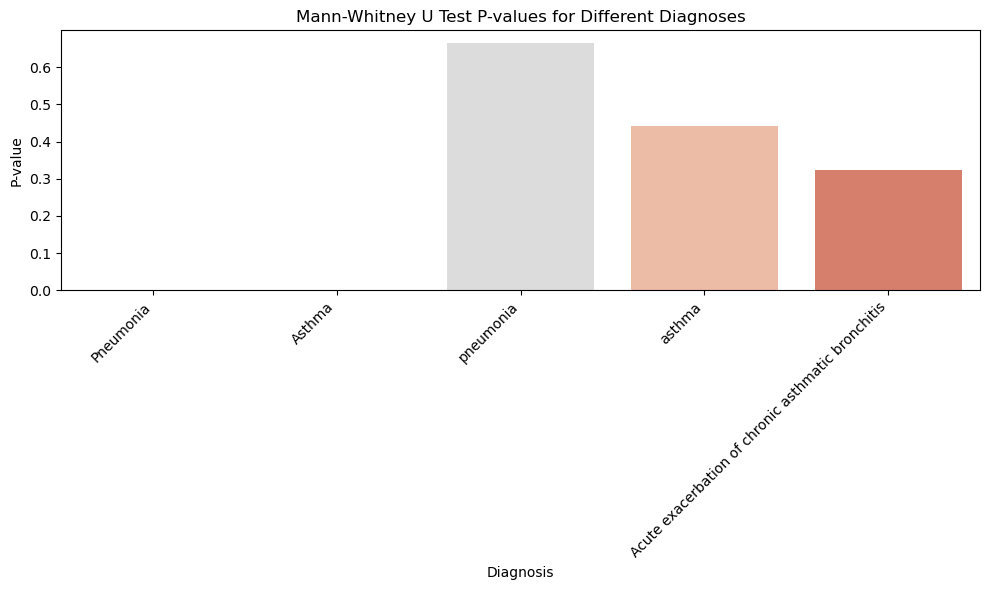

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Assuming you have a DataFrame named 'resp_patients_data' with columns 'LOS_Hours' and 'Diagnosis'
# Replace 'resp_patients_data' with the actual name of your DataFrame and columns with the actual column names

# Perform the Mann-Whitney U test for each diagnosis compared to all others
diagnoses = resp_patients_data['Diagnosis'].unique()
p_values = []

for diagnosis in diagnoses:
    # Filter the data for the current diagnosis
    resp_filtered = resp_patients_data[resp_patients_data['Diagnosis'] == diagnosis]
    
    # Separate los hours for the current diagnosis
    los_diagnosis = resp_filtered['LOS_Hours']
    
    # Perform Mann-Whitney U test for the current diagnosis against all others
    other_diagnoses = resp_patients_data[resp_patients_data['Diagnosis'] != diagnosis]['LOS_Hours']
    statistic, p_value = mannwhitneyu(los_diagnosis, other_diagnoses)
    
    # Append p-value to the list
    p_values.append(p_value)

# Create a DataFrame for visualization
p_values_df = pd.DataFrame({'Diagnosis': diagnoses, 'P-value': p_values})

# Plot the results using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=p_values_df, x='Diagnosis', y='P-value', palette='coolwarm')
plt.title('Mann-Whitney U Test P-values for Different Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('P-value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipykernel_20/797567491.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resp_patients_data['Diagnosis'] = resp_patients_data['Diagnosis'].str.lower()


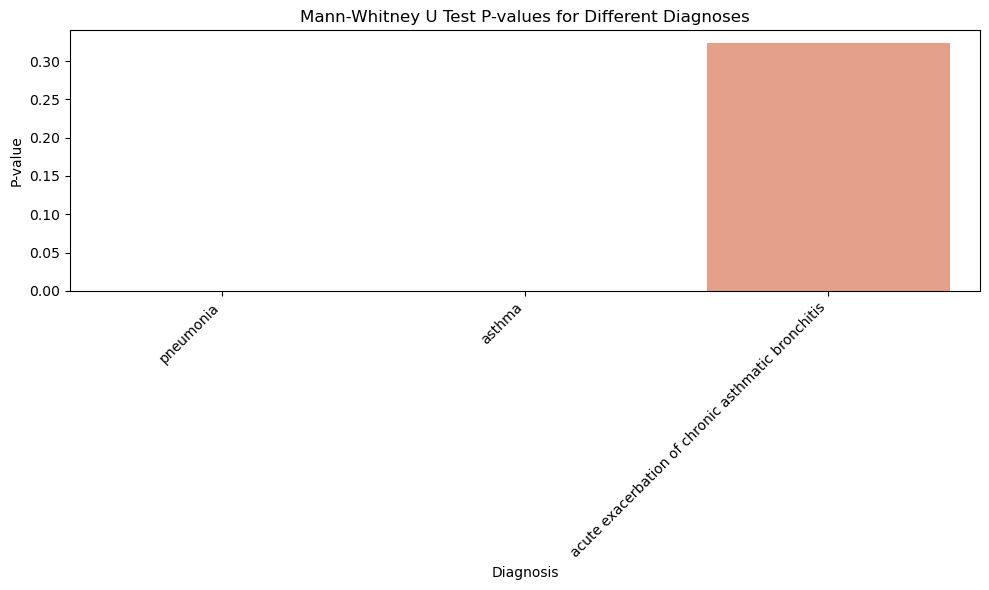

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Assuming you have a DataFrame named 'resp_patients_data' with columns 'LOS_Hours' and 'Diagnosis'
# Replace 'resp_patients_data' with the actual name of your DataFrame and columns with the actual column names

# Convert all diagnoses to lowercase
resp_patients_data['Diagnosis'] = resp_patients_data['Diagnosis'].str.lower()

# Perform the Mann-Whitney U test for each diagnosis compared to all others
diagnoses = resp_patients_data['Diagnosis'].unique()
p_values = []

for diagnosis in diagnoses:
    # Filter the data for the current diagnosis
    resp_filtered = resp_patients_data[resp_patients_data['Diagnosis'] == diagnosis]
    
    # Separate los hours for the current diagnosis
    los_diagnosis = resp_filtered['LOS_Hours']
    
    # Perform Mann-Whitney U test for the current diagnosis against all others
    other_diagnoses = resp_patients_data[resp_patients_data['Diagnosis'] != diagnosis]['LOS_Hours']
    statistic, p_value = mannwhitneyu(los_diagnosis, other_diagnoses)
    
    # Append p-value to the list
    p_values.append(p_value)

# Create a DataFrame for visualization
p_values_df = pd.DataFrame({'Diagnosis': diagnoses, 'P-value': p_values})

# Plot the results using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=p_values_df, x='Diagnosis', y='P-value', palette='coolwarm')
plt.title('Mann-Whitney U Test P-values for Different Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('P-value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Mann-Whitney U Test Results for LOS_Hours and Age Group:
         AgeGroup       P-value
0        65 to 70  8.630315e-14
1        71 to 80  8.875867e-40
2        25 to 34  3.060585e-15
3        45 to 54  2.732674e-01
4        81 to 90  1.672786e-53
5        35 to 44  6.054115e-05
6        13 to 19  3.283858e-16
7         6 to 12  6.577870e-24
8        55 to 64  2.314240e-04
9        20 to 24  1.018863e-11
10         0 to 5  1.494573e-25
11       91 to 99  2.503858e-09
12  100 and above  9.772008e-01


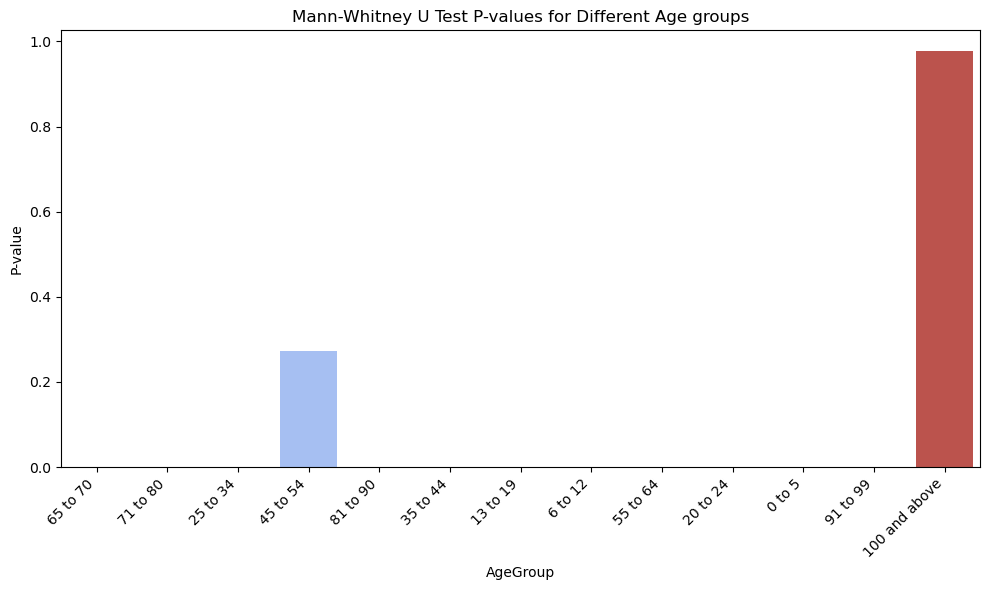

In [18]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Assuming you have a DataFrame named 'patient_data' with columns 'LOS' and 'Age_Group'
# Replace 'patient_data' with the actual name of your DataFrame and columns with the actual column names

# Perform the Mann-Whitney U test for LOS between different age groups
age_groups = resp_patients_data['AgeGroup'].unique()
p_values = []

for age_group in age_groups:
    # Filter the data for the current age group
    group_data = resp_patients_data[resp_patients_data['AgeGroup'] == age_group]['LOS_Hours']
    
    # Perform Mann-Whitney U test for the current age group against all others
    other_groups = resp_patients_data[resp_patients_data['AgeGroup'] != age_group]['LOS_Hours']
    statistic, p_value = mannwhitneyu(group_data, other_groups)
    
    # Append p-value to the list
    p_values.append(p_value)

# Create a DataFrame for visualization
p_values_df = pd.DataFrame({'AgeGroup': age_groups, 'P-value': p_values})

# Print the results
print("Mann-Whitney U Test Results for LOS_Hours and Age Group:")
print(p_values_df)




# You can also visualize the results if needed


plt.figure(figsize=(10, 6))
sns.barplot(data=p_values_df, x='AgeGroup', y='P-value', palette='coolwarm')
plt.title('Mann-Whitney U Test P-values for Different Age groups')
plt.xlabel('AgeGroup')
plt.ylabel('P-value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' with columns 'Diagnosis' and 'Age_Group'
# Replace 'data' with the actual name of your DataFrame and columns with the actual column names

# Create a contingency table
contingency_table = resp_patients_data.crosstab( resp_patients_data['Diagnosis'], data['Age_Group'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print test results
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

# Visualize the contingency table
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
plt.title('Contingency Table of Diagnosis vs. Age Group')
plt.xlabel('Age Group')
plt.ylabel('Diagnosis')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'crosstab'

In [ ]:
from scipy.stats import ranksums

# Define function to perform Wilcoxon rank-sum test for each group
def wilcoxon_test(group1, group2):
    statistic, p_value = ranksums(group1, group2)
    return statistic, p_value

# Perform Wilcoxon rank-sum test for Diagnosis
statistic_diag, p_value_diag = wilcoxon_test(resp_patients_data[resp_patients_data['Diagnosis'] == 'Asthma']['LOS'], 
                                             resp_patients_data[resp_patients_data['Diagnosis'] == 'Pneumonia']['LOS'])
print("Wilcoxon rank-sum test results for Diagnosis:")
print("Statistic:", statistic_diag)
print("P-value:", p_value_diag)

# Perform Wilcoxon rank-sum test for Age Group
statistic_age, p_value_age = wilcoxon_test(resp_patients_data[resp_patients_data['AgeGroup'] == 'Under 30']['LOS'], 
                                           resp_patients_data[resp_patients_data['AgeGroup'] == 'Over 30']['LOS'])
print("\nWilcoxon rank-sum test results for Age Group:")
print("Statistic:", statistic_age)
print("P-value:", p_value_age)

# Perform Wilcoxon rank-sum test for Gender
statistic_gender, p_value_gender = wilcoxon_test(resp_patients_data[resp_patients_data['Gender'] == 'Male']['LOS'], 
                                                 resp_patients_data[resp_patients_data['Gender'] == 'Female']['LOS'])
print("\nWilcoxon rank-sum test results for Gender:")
print("Statistic:", statistic_gender)
print("P-value:", p_value_gender)

In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Assuming you have a DataFrame named 'patient_data' with columns 'LOS' and 'Age_Group'
# Replace 'patient_data' with the actual name of your DataFrame and columns with the actual column names

# Perform the Mann-Whitney U test for LOS between different age groups
age_groups = resp_patients_data['Gender'].unique()
p_values = []

for age_group in age_groups:
    # Filter the data for the current age group
    group_data = resp_patients_data[resp_patients_data['Gender'] == age_group]['LOS']
    
    # Perform Mann-Whitney U test for the current age group against all others
    other_groups = resp_patients_data[resp_patients_data['Gender'] != age_group]['LOS']
    statistic, p_value = mannwhitneyu(group_data, other_groups)
    
    # Append p-value to the list
    p_values.append(p_value)

# Create a DataFrame for visualization
p_values_df = pd.DataFrame({'Gender': age_groups, 'P-value': p_values})

# Print the results
print("Mann-Whitney U Test Results for LOS and Gender:")
print(p_values_df)




# You can also visualize the results if needed


plt.figure(figsize=(10, 6))
sns.barplot(data=p_values_df, x='Gender', y='P-value', palette='coolwarm')
plt.title('Mann-Whitney U Test P-values for Different Gender')
plt.xlabel('Gender')
plt.ylabel('P-value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import kruskal

# Assuming 'resp_patients_data' is your DataFrame with columns 'Diagnosis' and 'LOS'
# Replace 'resp_patients_data' with your actual DataFrame name

# Perform the Kruskal-Wallis H test
statistic, p_value = kruskal(*[group['LOS_Hours'] for name, group in resp_patients_data.groupby('Diagnosis')])

# Print the test results
print("Kruskal-Wallis H test results for Diagnosis and LOS:")
print("Statistic:", statistic)
print("P-value:", p_value)


# Visualize the data
plt.figure(figsize=(10, 6))
sns.violinplot(x='Diagnosis', y='LOS_Hours', data=resp_patients_data)
plt.title('Boxplot of Value by LOS')
plt.xlabel('LOS_Hours')
plt.ylabel('Diagnosis')
plt.show()

In [ ]:
avg_los_by_diagnosis = resp_patients_data.groupby('Diagnosis')['LOS_Hours'].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_los_by_diagnosis.index, avg_los_by_diagnosis.values)
plt.title('Average LOS by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Average Length of Stay (LOS_Hours)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'resp_patients_data' is your DataFrame with the LOS column
# Replace 'resp_patients_data' with your actual DataFrame name and 'LOS' with the actual column name

# Calculate summary statistics
los_summary = resp_patients_data['LOS_Hours'].describe()

# Print summary statistics
print("Summary statistics for LOS:")
print(los_summary)

# Visualize the distribution of LOS using a histogram
plt.figure(figsize=(10, 6))
plt.hist(resp_patients_data['LOS_Hours'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Length of Stay (LOS)')
plt.xlabel('LOS (Hours)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import kruskal

# Assuming 'resp_patients_data' is your DataFrame with columns 'Diagnosis' and 'LOS'
# Replace 'resp_patients_data' with your actual DataFrame name

# Extract LOS values for each diagnosis category
los_by_diagnosis = [group_data['LOS_Hours'].values for _, group_data in resp_patients_data.groupby('Diagnosis')]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(*los_by_diagnosis)

# Print the test results
print("Kruskal-Wallis test results:")
print("Statistic:", statistic)
print("P-value:", p_value)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import kruskal

# Assuming 'resp_patients_data' is your DataFrame with columns 'Diagnosis' and 'LOS'
# Replace 'resp_patients_data' with your actual DataFrame name

# Extract LOS values for each diagnosis category
los_by_diagnosis = [group_data['LOS_Hours'].values for _, group_data in resp_patients_data.groupby('Diagnosis')]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(*los_by_diagnosis)

# Print the test results
print("Kruskal-Wallis test results:")
print("Statistic:", statistic)
print("P-value:", p_value)

# Visualize the LOS distribution for each diagnosis category using a box plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Diagnosis', y='LOS_Hours', data=resp_patients_data)
plt.title('LOS Distribution by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('LOS_Hours')

# Adjust rotation of x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them to the right

plt.show()

# Compute the p-values for each diagnosis type
p_values = resp_patients_data.groupby('Diagnosis')['P-value'].mean().reset_index()

# Sort the data by p-value
p_values = p_values.sort_values(by='P-value', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='P-value', y='Diagnosis', data=p_values, palette='viridis')
plt.title('P-values for Different Diagnosis Types')
plt.xlabel('P-value')
plt.ylabel('Diagnosis')

# Adjust rotation of x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them to the right

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import kruskal

# Assuming 'resp_patients_data' is your DataFrame with columns 'Diagnosis' and 'LOS'
# Replace 'resp_patients_data' with your actual DataFrame name

# Extract LOS values for each diagnosis category
los_by_diagnosis = [group_data['LOS_Hours'].values for _, group_data in resp_patients_data.groupby('AgeGroup')]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(*los_by_diagnosis)

# Print the test results
print("Kruskal-Wallis test results:")
print("Statistic:", statistic)
print("P-value:", p_value)

# Visualize the LOS distribution for each diagnosis category using a box plot
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='LOS_Hours', data=resp_patients_data)
plt.title('LOS Distribution by AgeGroup')
plt.xlabel('AgeGroup')
plt.ylabel('LOS_Hours')

# Adjust rotation of x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them to the right

plt.show()

# Compute the p-values for each diagnosis type
p_values = resp_patients_data.groupby('AgeGroup')['P-value'].mean().reset_index()

# Sort the data by p-value
p_values = p_values.sort_values(by='P-value', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='P-value', y='AgeGroup', data=p_values, palette='viridis')
plt.title('P-values for Different AgeGroup Types')
plt.xlabel('P-value')
plt.ylabel('AgeGroup')

# Adjust rotation of x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them to the right

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal

# Assuming 'resp_patients_data' is your DataFrame with columns 'Diagnosis' and 'LOS'
# Replace 'resp_patients_data' with your actual DataFrame name

# Extract LOS values for each age group category
los_by_age_group = [group_data['LOS_Hours'].values for _, group_data in resp_patients_data.groupby('AgeGroup')]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(*los_by_age_group)

# Print the test results
print("Kruskal-Wallis test results:")
print("Statistic:", statistic)
print("P-value:", p_value)

# Visualize the LOS distribution for each age group category using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='LOS_Hours', data=resp_patients_data)
plt.title('LOS Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('LOS Hours')

# Adjust rotation of x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them to the right

plt.show()

# Compute the p-values for each age group type
p_values = resp_patients_data.groupby('AgeGroup')['P_value'].mean().reset_index()

# Sort the data by p-value
p_values = p_values.sort_values(by='P_value', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='P_value', y='AgeGroup', data=p_values, palette='viridis')
plt.title('P-values for Different Age Group Types')
plt.xlabel('P-value')
plt.ylabel('Age Group')

# Adjust rotation of x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them to the right

plt.show()

In [ ]:
# Filter out rows with 'Unknown' gender
filtered_data = resp_patients_data.loc[resp_patients_data['Gender'].isin(['Male', 'Female'])]
resp_patients_data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal

# Assuming 'resp_patients_data' is your DataFrame with columns 'Diagnosis' and 'LOS'
# Replace 'resp_patients_data' with your actual DataFrame name

# Extract LOS values for each age group category
los_by_age_group = [group_data['LOS_Hours'].values for _, group_data in resp_patients_data.groupby('Gender')]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(*los_by_age_group)

# Print the test results
print("Kruskal-Wallis test results:")
print("Statistic:", statistic)
print("P-value:", p_value)

# Visualize the LOS distribution for each age group category using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='LOS_Hours', data=resp_patients_data)
plt.title('LOS Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('LOS Hours')

# Adjust rotation of x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them to the right

plt.show()

# Compute the p-values for each age group type
p_values = resp_patients_data.groupby('Gender')['P_value'].mean().reset_index()

# Sort the data by p-value
p_values = p_values.sort_values(by='P_value', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='P_value', y='Gender', data=p_values, palette='viridis')
plt.title('P-values for Different Gender Types')
plt.xlabel('P-value')
plt.ylabel('Gender')

# Adjust rotation of x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them to the right

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal

# Assuming 'resp_patients_data' is your DataFrame with columns 'Gender' and 'LOS_Hours'
# Replace 'resp_patients_data' with your actual DataFrame name

# Filter out rows with 'Unknown' gender
resp_patients_data_filtered = resp_patients_data[resp_patients_data['Gender'].isin(['Male', 'Female'])]

# Extract LOS values for each gender category
los_by_gender = [group_data['LOS_Hours'].values for _, group_data in resp_patients_data_filtered.groupby('Gender')]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(*los_by_gender)

# Print the test results
print("Kruskal-Wallis test results:")
print("Statistic:", statistic)
print("P-value:", p_value)

# Visualize the LOS distribution for each gender category using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='LOS_Hours', data=resp_patients_data_filtered)
plt.title('LOS Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('LOS Hours')

# Adjust rotation of x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them to the right

plt.show()

# Compute the p-values for each gender type
p_values = resp_patients_data_filtered.groupby('Gender')['P-value'].mean().reset_index()

# Sort the data by p-value
p_values = p_values.sort_values(by='P-value', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='P-value', y='Gender', data=p_values, palette='viridis')
plt.title('P-values for Male and Female')
plt.xlabel('P-value')
plt.ylabel('Gender')

# Adjust rotation of x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them to the right

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal

# Assuming 'resp_patients_data' is your DataFrame with columns 'Gender' and 'LOS_Hours'
# Replace 'resp_patients_data' with your actual DataFrame name

# Extract LOS values for each gender category
los_by_gender = [group_data['LOS_Hours'].values for _, group_data in resp_patients_data.groupby('Gender')]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(*los_by_gender)

# Print the test results
print("Kruskal-Wallis test results:")
print("Statistic:", statistic)
print("P-value:", p_value)

# Visualize the LOS distribution for each gender category using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='LOS_Hours', data=resp_patients_data)
plt.title('LOS Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('LOS_Hours')

# Adjust rotation of x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them to the right

plt.show()

# Compute the p-values for each gender type
p_values = resp_patients_data.groupby('Gender')['P-value'].mean().reset_index()

# Sort the data by p-value
p_values = p_values.sort_values(by='P-value', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='P-value', y='Gender', data=p_values, palette='viridis')
plt.title('P-values for Different Gender Types')
plt.xlabel('P-value')
plt.ylabel('Gender')

# Adjust rotation of x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them to the right

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the LOS distribution for each diagnosis category using a box plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Diagnosis', y='LOS_Hours', data=resp_patients_data)
plt.title('LOS Distribution by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('LOS_Hours')
plt.show()

# Compute the p-values for each diagnosis type
p_values = resp_patients_data.groupby('Diagnosis')['P-value'].mean().reset_index()

# Sort the data by p-value
p_values = p_values.sort_values(by='P-value', ascending=False)

# Plotting
plt.figure(figsize=(10, 10))
sns.barplot(x='P-value', y='Diagnosis', data=p_values, palette='viridis')
plt.title('P-values for Different Diagnosis Types')
plt.xlabel('P-value')
plt.ylabel('Diagnosis')
plt.show()




In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the p-values for each diagnosis type
p_values = resp_patients_data.groupby('Diagnosis')['P-value'].mean().reset_index()

# Sort the data by p-value
p_values = p_values.sort_values(by='P-value', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='P-value', y='Diagnosis', data=p_values, palette='viridis')
plt.title('P-values for Different Diagnosis Types')
plt.xlabel('P-value')
plt.ylabel('Diagnosis')
plt.show()

In [ ]:
# Get the top 5 most frequent complaints to be used in the model
top_5_complaints = resp_patients_data['PresentingComplaint'].value_counts().head(5).index.tolist()

# Filter the data to keep only the rows with the top 5 complaints
resp_patients_data = resp_patients_data[resp_patients_data['PresentingComplaint'].isin(top_5_complaints)]
resp_patients_data

# remove duplicated values with spelling issues 

In [ ]:
#removing columns to address any speling issues with the presenting complaint.
resp_patients_data = resp_patients_data[resp_patients_data['Diagnosis'] != 'pneumonia']
resp_patients_data = resp_patients_data[resp_patients_data['Diagnosis'] != 'asthma']
resp_patients_data

# Converting the features to numerical data

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
labelencoder = LabelEncoder()

# Columns to be encoded
resppat_encode = ['AgeGroup', 'PresentingComplaint', 'Gender']

# Loop through each column and perform label encoding
for column in resppat_encode:
    resp_patients_data[column] = labelencoder.fit_transform(resp_patients_data[column])

In [ ]:
  resp_patients_data

In [ ]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the top 10 complaints and transform the column
resp_patients_data['AgeGroup'] = label_encoder.fit_transform(resp_patients_data['AgeGroup'])
resp_patients_data

In [ ]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the top 10 complaints and transform the column
resp_patients_data['Gender'] = label_encoder.fit_transform(resp_patients_data['Gender'])
resp_patients_data

In [ ]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the top complaints and transform the column
resp_patients_data['PresentingComplaint'] = label_encoder.fit_transform(resp_patients_data['PresentingComplaint'])
resp_patients_data

# MODEL DEVELOPMENT

# Splitting the data to train and test set

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(resp_patients_data.drop('Diagnosis', axis=1), resp_patients_data['Diagnosis'], test_size=0.2, random_state=42)



In [ ]:
print(X_train)

In [ ]:
print(X_test)

In [ ]:
print(y_train)

In [ ]:
print(y_test)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

# Training the Model

In [ ]:
# model training
nn = KNeighborsClassifier(n_neighbors=3)
nn.fit(X_train,y_train)

# KNN Model

In [ ]:
# Predict from the test dataset
yknn_predict = nn.predict(X_test)
# Calculate the accuracy
from sklearn.metrics import accuracy_score
# accuracy
accuracy_score(y_test, yknn_predict)

In [ ]:
# Importing the classification report
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, yknn_predict))

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate and print the confusion matrix
print(confusion_matrix(y_test, yknn_predict))


In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def confusionM(y_true, yknn_predict, target_names):
    cMatrix = confusion_matrix(y_true, yknn_predict)
    df_cm = pd.DataFrame(cMatrix, index=target_names, columns=target_names)
    plt.figure(figsize=(6,4))
    cm = sns.heatmap(df_cm, annot=True, fmt="d")
    cm.yaxis.set_ticklabels(cm.yaxis.get_ticklabels(), rotation=90)
    cm.xaxis.set_ticklabels(cm.xaxis.get_ticklabels(), rotation=0)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# get the unique class names
class_names = resp_patients_data.Diagnosis.unique() 

# ensure the class_names array matches the actual number of unique classes
class_names = class_names[:2]

# visualize the confusion matrix
confusionM(y_test, yknn_predict, class_names)







# Random Forest Model

In [ ]:
RandomForest = RandomForestClassifier(n_estimators=1000)
RandomForest.fit(X_train,y_train)
yrf_predict = RandomForest.predict(X_test)
accuracy_score(y_test, yrf_predict)

In [ ]:
print(classification_report(y_test, yrf_predict))

In [ ]:

# Calculate and print the confusion matrix
print(confusion_matrix(y_test, yrf_predict))

In [ ]:
def confusionM(y_true,  yrf_predict, target_names):
    cMatrix = confusion_matrix(y_true,  yrf_predict)
    df_cm = pd.DataFrame(cMatrix, index=target_names, columns=target_names)
    plt.figure(figsize=(6,4))
    cm = sns.heatmap(df_cm, annot=True, fmt="d")
    cm.yaxis.set_ticklabels(cm.yaxis.get_ticklabels(), rotation=90)
    cm.xaxis.set_ticklabels(cm.xaxis.get_ticklabels(), rotation=0)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# get the unique class names
class_names = resp_patients_data.Diagnosis.unique() 

# ensure the class_names array matches the actual number of unique classes
class_names = class_names[:2]

# visualize the confusion matrix
confusionM(y_test,  yrf_predict, class_names)

# Logistic regression model

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
ylg_predict = logreg.predict(X_test)
accuracy_score(y_test, ylg_predict)

In [ ]:
print(classification_report(y_test, ylg_predict))

In [ ]:
# Calculate and print the confusion matrix
print(confusion_matrix(y_test, ylg_predict))

In [ ]:
def confusionM(y_true,  ylg_predict, target_names):
    cMatrix = confusion_matrix(y_true, ylg_predict)
    df_cm = pd.DataFrame(cMatrix, index=target_names, columns=target_names)
    plt.figure(figsize=(6,4))
    cm = sns.heatmap(df_cm, annot=True, fmt="d")
    cm.yaxis.set_ticklabels(cm.yaxis.get_ticklabels(), rotation=90)
    cm.xaxis.set_ticklabels(cm.xaxis.get_ticklabels(), rotation=0)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# get the unique class names
class_names = resp_patients_data.Diagnosis.unique() 

# ensure the class_names array matches the actual number of unique classes
class_names = class_names[:2]

# visualize the confusion matrix
confusionM(y_test,  ylg_predict, class_names)

# Decision Tree Model

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
ydt_predict = decision_tree.predict(X_test)
accuracy_score(y_test, ydt_predict)

In [ ]:
print(classification_report(y_test, ydt_predict))

In [ ]:
# Calculate and print the confusion matrix
print(confusion_matrix(y_test, ydt_predict))

In [ ]:
def confusionM(y_true,  ydt_predict, target_names):
    cMatrix = confusion_matrix(y_true, ydt_predict)
    df_cm = pd.DataFrame(cMatrix, index=target_names, columns=target_names)
    plt.figure(figsize=(6,4))
    cm = sns.heatmap(df_cm, annot=True, fmt="d")
    cm.yaxis.set_ticklabels(cm.yaxis.get_ticklabels(), rotation=90)
    cm.xaxis.set_ticklabels(cm.xaxis.get_ticklabels(), rotation=0)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# get the unique class names
class_names = resp_patients_data.Diagnosis.unique() 

# ensuring the class_names array matches the actual number of unique classes
class_names = class_names[:2]

# visualizing the confusion matrix
confusionM(y_test,  ydt_predict, class_names)

# Model Comparison

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

positive_label = 'Asthma'  

models = [('KNN', nn), ('Random Forest', RandomForest), ('Logistic Regression', logreg), ('Decision Tree', decision_tree)]

# Creating dictionaries to store the evaluation results
accuracy = {}
precision = {}
recall = {}
f1 = {}

for name, model in models:
    predictions = model.predict(X_test)
    
    accuracy[name] = accuracy_score(y_test, predictions)
    precision[name] = precision_score(y_test, predictions, pos_label=positive_label)
    recall[name] = recall_score(y_test, predictions, pos_label=positive_label)
    f1[name] = f1_score(y_test, predictions, pos_label=positive_label)

# Printing the evaluation results
print('Accuracy:')
for name, acc in accuracy.items():
    print(f'{name}: {acc}')

print('\nPrecision:')
for name, prec in precision.items():
    print(f'{name}: {prec}')

print('\nRecall:')
for name, rec in recall.items():
    print(f'{name}: {rec}')

print('\nF1 Score:')
for name, f1_score in f1.items():
    print(f'{name}: {f1_score}')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

positive_label = 'Pneumonia'  # Specify the positive label based on your data

models = [('KNN', nn), ('Random Forest', RandomForest), ('Logistic Regression', logreg), ('Decision Tree', decision_tree)]

# Create dictionaries to store the evaluation results
accuracy = {}
precision = {}
recall = {}
f1 = {}

for name, model in models:
    predictions = model.predict(X_test)
    
    accuracy[name] = accuracy_score(y_test, predictions)
    precision[name] = precision_score(y_test, predictions, pos_label=positive_label)
    recall[name] = recall_score(y_test, predictions, pos_label=positive_label)
    f1[name] = f1_score(y_test, predictions, pos_label=positive_label)

# Print the evaluation results
print('Accuracy:')
for name, acc in accuracy.items():
    print(f'{name}: {acc}')

print('\nPrecision:')
for name, prec in precision.items():
    print(f'{name}: {prec}')

print('\nRecall:')
for name, rec in recall.items():
    print(f'{name}: {rec}')

print('\nF1 Score:')
for name, f1_score in f1.items():
    print(f'{name}: {f1_score}')